In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Input
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("vgsales.csv")
data =data.drop(columns=['Year'], axis=1)
data.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

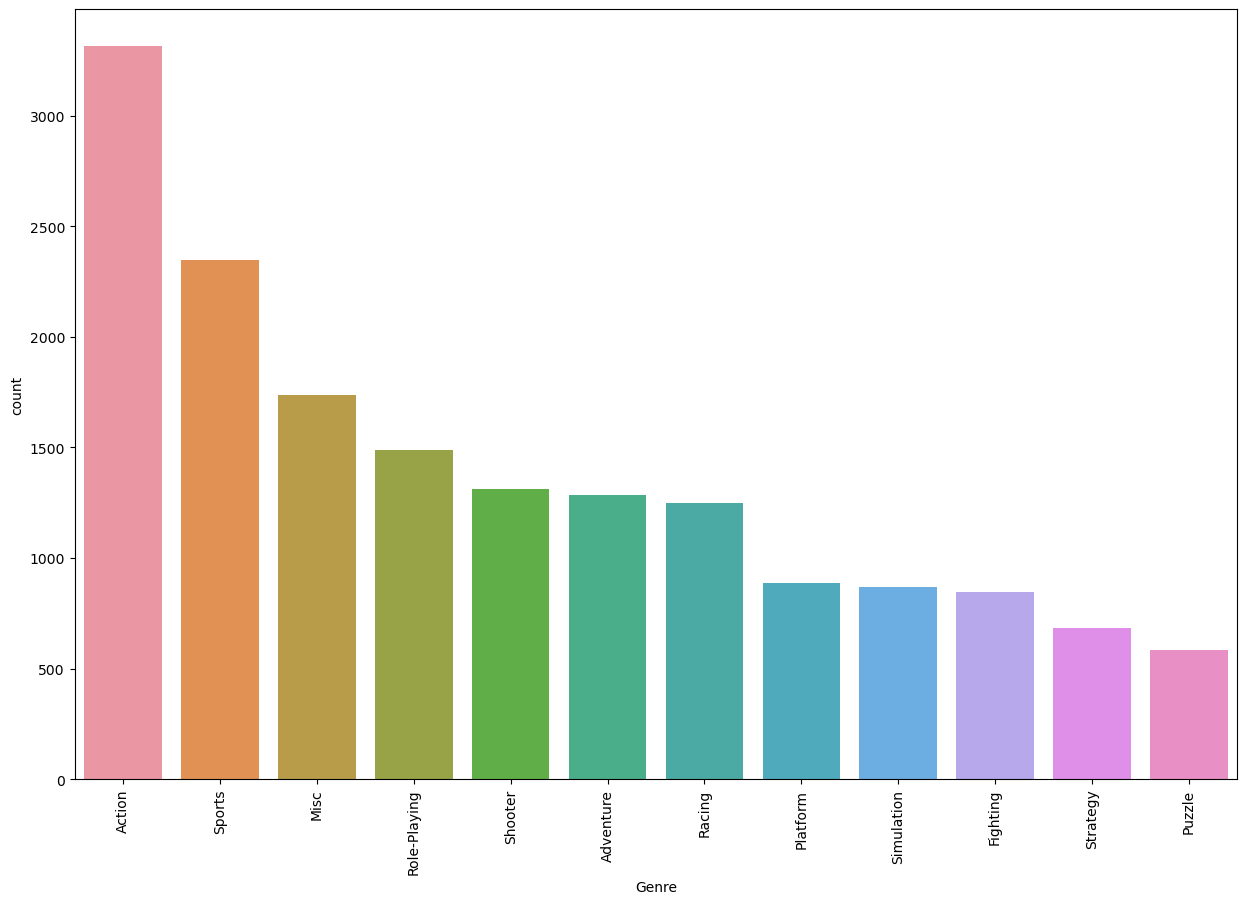

In [4]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

In [5]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
data_platform

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'XB'),
  Text(11, 0, 'GB'),
  Text(12, 0, 'NES'),
  Text(13, 0, '3DS'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

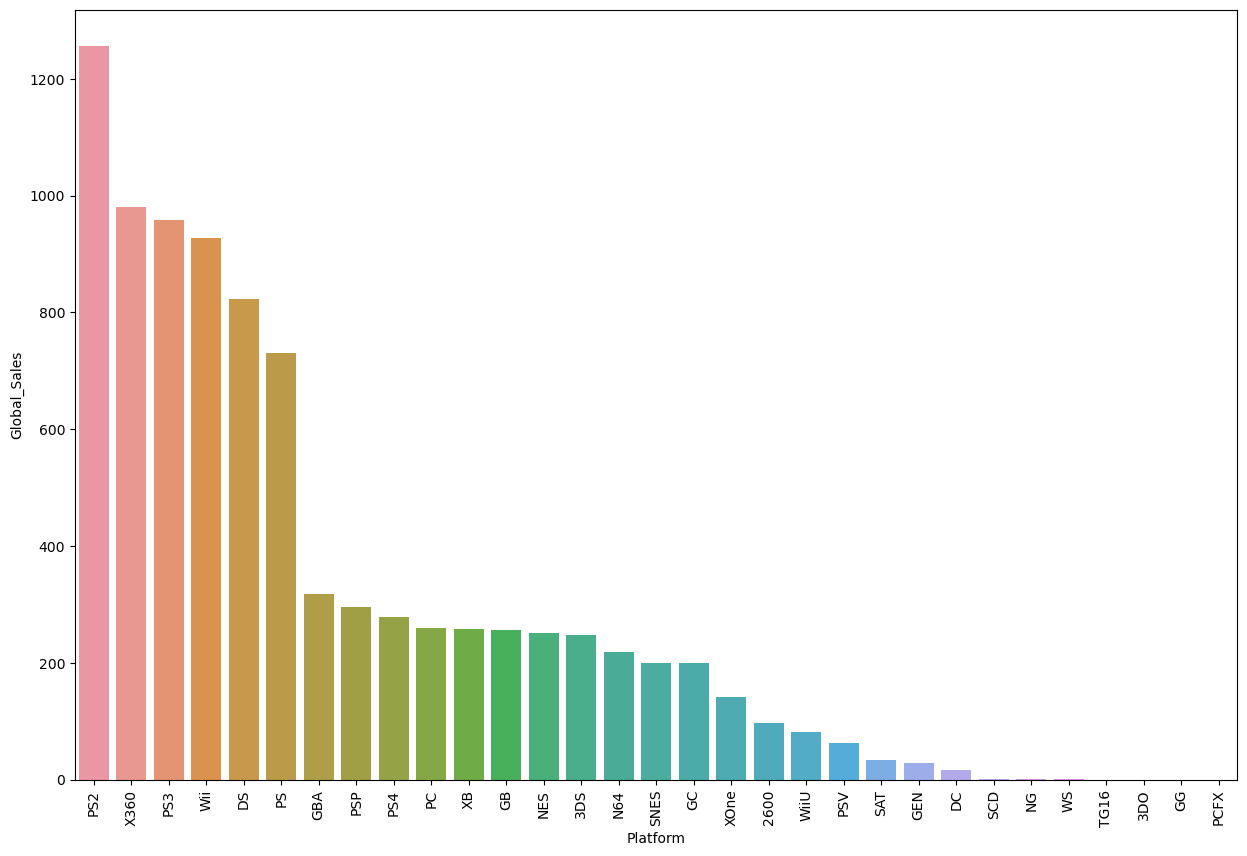

In [6]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x209eb8c4d90>,
 [Text(-1.0997117196231407, 0.025182011903636795, 'NA_Sales'),
  Text(0.7981566836336687, -0.7569319047119786, 'EU_Sales'),
  Text(0.9356428820826654, 0.5784223346379734, 'JP_Sales'),
  Text(0.3051495666421934, 1.0568272053548213, 'Other_Sales')],
 [Text(-0.5998427561580767, 0.01373564285652916, '49.3%'),
  Text(0.43535819107291013, -0.41287194802471555, '27.3%'),
  Text(0.5103506629541811, 0.3155030916207127, '14.5%'),
  Text(0.1664452181684691, 0.5764512029208116, '8.9%')])

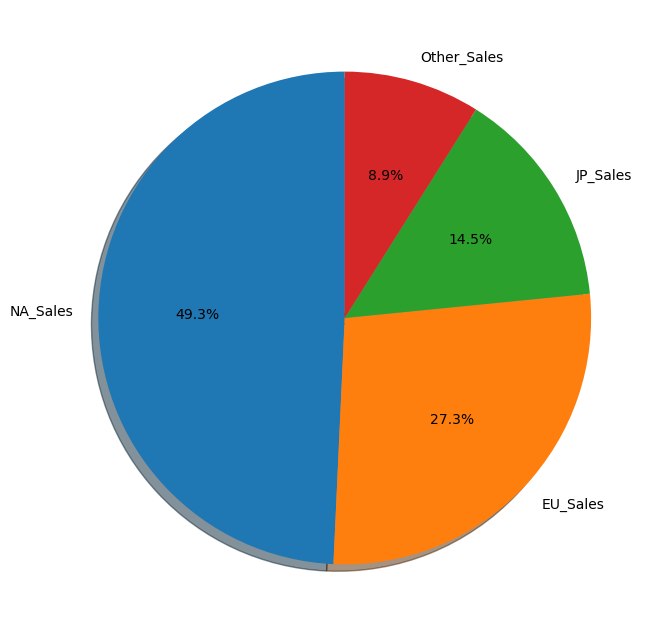

In [7]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sizes = top_sale_reg.mean()
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

In [8]:
data.dtypes

Rank              int64
Name             object
Platform         object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Encoding categorial data

In [9]:
num=LabelEncoder()
data['Platform']=num.fit_transform(data['Platform'].astype('str'))
data['Publisher']=num.fit_transform(data['Publisher'].astype('str'))
data['Genre']=num.fit_transform(data['Genre'].astype('str'))
data.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,10,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,4,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,6,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,10,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,7,359,11.27,8.89,10.22,1.00,31.37


In [10]:
data.dtypes

Rank              int64
Name             object
Platform          int32
Genre             int32
Publisher         int32
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

drop unnecessary columns

In [11]:
new_data=data.drop(columns=['Rank','Name'],axis=1)
new_data.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,26,10,359,41.49,29.02,3.77,8.46,82.74
1,11,4,359,29.08,3.58,6.81,0.77,40.24
2,26,6,359,15.85,12.88,3.79,3.31,35.82
3,26,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7,359,11.27,8.89,10.22,1.00,31.37


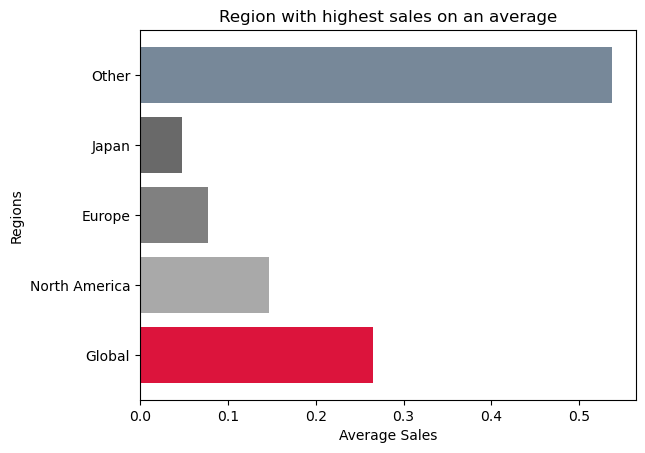

In [12]:
# Data for the bar chart
regions = ['Global', 'North America', 'Europe', 'Japan', 'Other']
selected_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Calculate the mean across specified columns along rows (axis=0)
average_sales = data[selected_columns].mean(axis=0)

# Colors for each bar
colors = ['crimson', 'darkgray', 'grey', 'dimgrey', 'lightslategray']

# Create a horizontal bar chart
plt.barh(regions, average_sales, color=colors)

# Set the title and axis labels
plt.title('Region with highest sales on an average')
plt.xlabel('Average Sales')
plt.ylabel('Regions')

# Show the plot
plt.show()

split input data and output

In [13]:
x=new_data.drop(columns=['Global_Sales'],axis=1)
y=new_data['Global_Sales']
print(x.shape,y.shape)

(16598, 7) (16598,)


split data to train and test

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3,random_state=0)

data scaling or normalization

In [15]:
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

building neural network

In [16]:
model=Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
#output layers     
model.add(Dense(1))#linear activation function

In [17]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

fitting the data or training and split train to train and validation with 20%

In [18]:
model.fit(x_train,y_train,batch_size=128,validation_split=0.2,epochs=100)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.8886 - mae: 0.3668 - val_loss: 0.0294 - val_mae: 0.1049
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0946 - mae: 0.1245 - val_loss: 0.0168 - val_mae: 0.0598
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0589 - mae: 0.0994 - val_loss: 0.0214 - val_mae: 0.0566
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0608 - mae: 0.0944 - val_loss: 0.0444 - val_mae: 0.0554
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0692 - mae: 0.0920 - val_loss: 0.0512 - val_mae: 0.0968
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1028 - mae: 0.1160 - val_loss: 0.0156 - val_mae: 0.0597
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0441 - mae: 0.0898 - val_loss: 0.0227 - val_mae: 0.0769
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0658 - mae: 0.0946 - val_loss: 0.0160 - val_mae: 0.0780
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.05

Show the graph of loss 

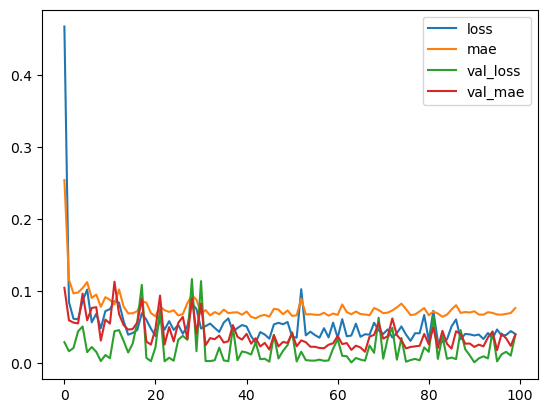

In [19]:
loss=pd.DataFrame(model.history.history)
loss.plot()
plt.show()

testing

In [20]:
prediction=model.predict(x_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
from sklearn.metrics import mean_absolute_error,explained_variance_score,r2_score,mean_squared_error

print mae , mse , acc

In [22]:
print(mean_absolute_error(y_test,prediction))
print(np.sqrt(mean_squared_error(y_test,prediction)))
print(explained_variance_score(y_test,prediction))
print(r2_score(y_test,prediction))

0.03766565894805284
0.13842534063096845
0.9910294888718252
0.9909504693118864


In [23]:
model.save('model_final.h5')

In [24]:
prediction,y_test

(array([[1.242361  ],
        [0.3328097 ],
        [0.27515274],
        ...,
        [0.5102128 ],
        [0.22466493],
        [0.19235784]], dtype=float32),
 1586    1.25
 5368    0.34
 6275    0.27
 9130    0.14
 5759    0.31
         ... 
 6020    0.29
 1643    1.22
 4002    0.50
 7259    0.22
 8151    0.18
 Name: Global_Sales, Length: 4980, dtype: float64)

In [25]:
y_test.head(2)

1586    1.25
5368    0.34
Name: Global_Sales, dtype: float64

In [26]:
prediction[1]

array([0.3328097], dtype=float32)

In [27]:
# Create a scatter plot to visualize prediction vs. actual
def plot_prediction_vs_actual(y_test, prediction):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, prediction, color='b', alpha=0.6, label='Predicted vs. Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
    plt.title('Prediction vs. Actual Scatter Plot')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

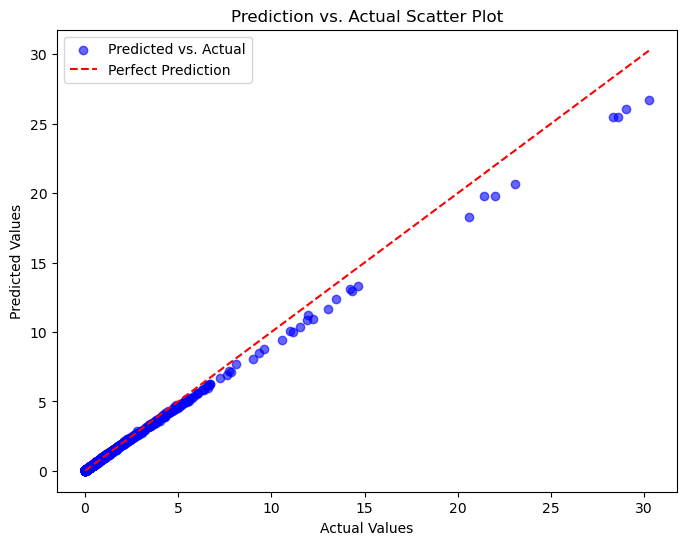

In [28]:
# Plot prediction vs. actual scatter plot
plot_prediction_vs_actual(y_test, prediction)

In [34]:
df=pd.DataFrame(prediction)
df1=pd.DataFrame(y_test)
lst=[]
for i in range(1,len(prediction)+1):
    lst.append(i)
df2=pd.DataFrame(lst)


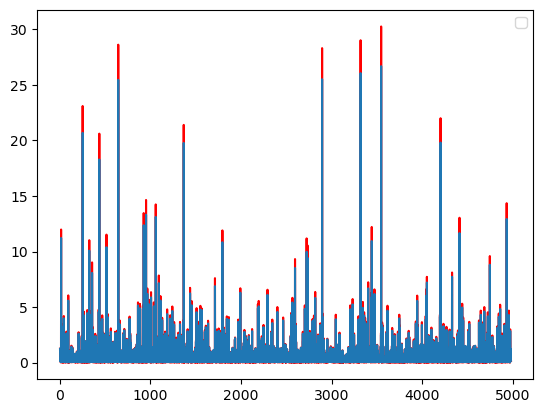

In [35]:
plt.figure()
plt.plot(df2,df1, color='red')
plt.plot(df2,df)

plt.legend()
plt.show()